#**Iman Noor**
###**Email: imannoor2002@gmail.com**

#**Electric Bike Ratings**

###**Problem Definition**
The objective of this project is to predict whether individuals own or do not own electric bikes based on various features and ratings associated with electric bikes. It is a binary classification problem where the target variable is "owned" (1 for owned, 0 for not owned).

##**Preparaing the tools**

In [39]:
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##**Load the Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/electric_bike_ratings_2212.csv')
df.shape

(1500, 8)

##**Exploratory Data Analysis (EDA)**

In [4]:
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [5]:
# Finding how many owned
df['owned'].value_counts()

1    890
0    610
Name: owned, dtype: int64

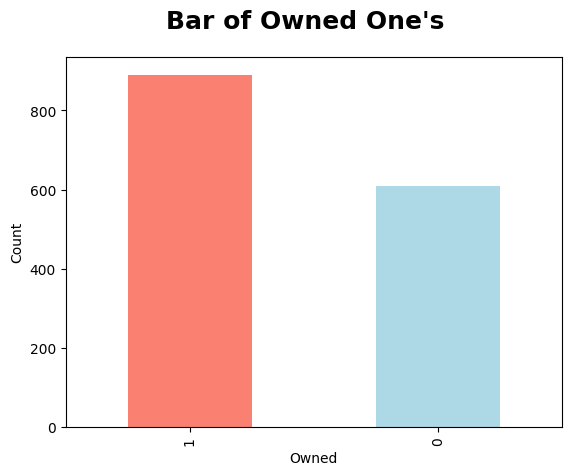

In [6]:
df['owned'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);
plt.xlabel('Owned')
plt.ylabel('Count')
plt.suptitle("Bar of Owned One's", fontsize=18, fontweight='bold');

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [8]:
plt.style.use('seaborn-v0_8-colorblind')

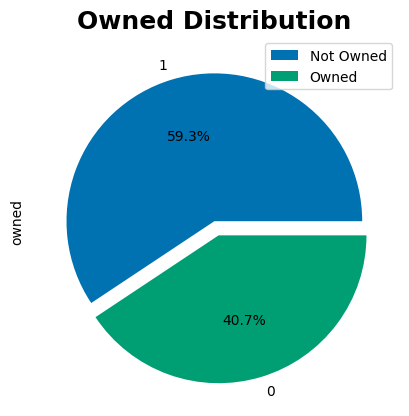

In [9]:
df['owned'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.1])
plt.legend(['Not Owned', 'Owned'])
plt.title('Owned Distribution',fontsize=18, weight='bold')
plt.show();

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


In [11]:
# Splitting review_month column
df[['review_month_date', 'review_month']] = df['review_month'].str.split('-', 1, expand=True)
df['review_month_date'] = df['review_month_date'].str.replace('[^0-9]', '', regex=True)

# Remove non-numeric symbols
df['reviewer_age'] = df['reviewer_age'].str.replace('-+', '', regex=True)
df['value_for_money'] = df['value_for_money'].str.replace('/+', '', regex=True).str.replace('10', '',regex=False).str.strip() # remove extra spaces

# Convert non-empty strings to integers and empty strings to NaN
df['reviewer_age'] = pd.to_numeric(df['reviewer_age'], errors='coerce')
df['value_for_money'] = pd.to_numeric(df['value_for_money'], errors='coerce')
df['review_month_date'] = pd.to_numeric(df['review_month_date'], errors='coerce')

df['value_for_money'] = df['value_for_money'].astype(float)

<ipython-input-11-70cbc91cef4c>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['review_month_date', 'review_month']] = df['review_month'].str.split('-', 1, expand=True)


In [12]:
df.isna().sum()

owned                  0
make_model             0
review_month         750
web_browser          150
reviewer_age         105
primary_use            0
value_for_money        1
overall_rating         0
review_month_date    750
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   owned              1500 non-null   int64  
 1   make_model         1500 non-null   object 
 2   review_month       750 non-null    object 
 3   web_browser        1350 non-null   object 
 4   reviewer_age       1395 non-null   float64
 5   primary_use        1500 non-null   object 
 6   value_for_money    1499 non-null   float64
 7   overall_rating     1500 non-null   float64
 8   review_month_date  750 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 105.6+ KB


In [14]:
def preprocess(df):
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      df[label]=content.astype('category').cat.as_ordered()
      df[label]=pd.Categorical(content).codes+1
  return df

In [15]:
df=preprocess(df)

In [16]:
# Filling column with the median
for label in ['reviewer_age', 'review_month_date','value_for_money']:
    if pd.api.types.is_numeric_dtype(df[label]):
        df[label].fillna(df[label].median(), inplace=True)

In [17]:
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser          0
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
review_month_date    0
dtype: int64

In [18]:
df.describe()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating,review_month_date
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,3.926000,3.322667,2.661333,32.626000,1.270000,4.974000,17.138907,16.032000
std,0.491375,1.404459,4.122525,1.528025,9.876124,0.444108,1.480581,2.445566,6.197681
min,0.000000,1.000000,0.000000,0.000000,16.000000,1.000000,1.000000,11.690000,1.000000
25%,0.000000,3.000000,0.000000,2.000000,24.000000,1.000000,4.000000,15.320000,16.000000
50%,1.000000,4.000000,0.500000,2.000000,33.000000,1.000000,5.000000,18.240000,16.000000
75%,1.000000,5.000000,7.000000,4.000000,41.000000,2.000000,6.000000,18.840000,16.000000
max,1.000000,6.000000,12.000000,6.000000,50.000000,2.000000,9.000000,22.760000,31.000000


In [19]:
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating,review_month_date
0,1,5,0,2,23.0,1,5.0,18.62,16.0
1,0,6,0,0,24.0,1,4.0,15.55,16.0
2,0,4,11,2,28.0,1,5.0,12.76,23.0
3,1,2,10,4,41.0,2,5.0,17.07,7.0
4,1,4,12,2,33.0,2,5.0,12.29,16.0


##**Data Visualization**

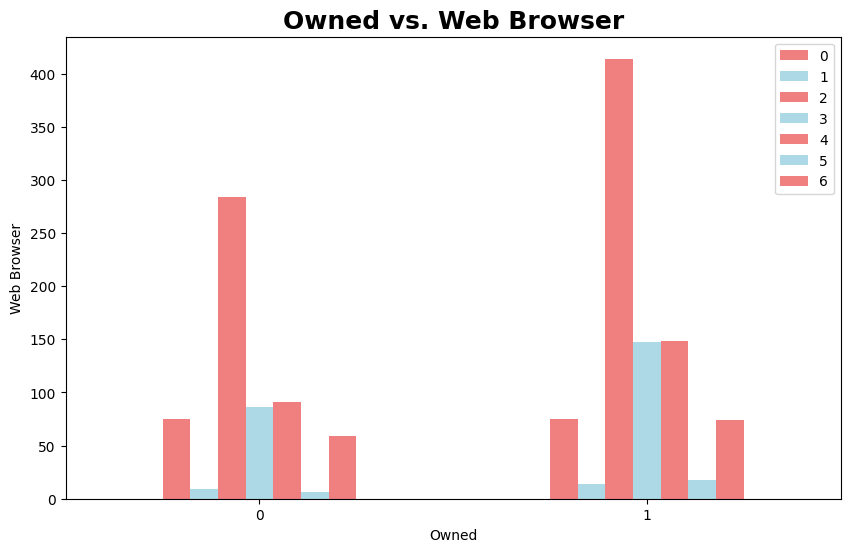

In [20]:
# Create plot of crosstab
pd.crosstab(df.owned, df.web_browser).plot(kind='bar', figsize=(10, 6),color=['lightcoral', 'lightblue'])
plt.title('Owned vs. Web Browser', fontsize=18, fontweight='bold')
plt.xlabel('Owned')
plt.ylabel('Web Browser')
plt.legend()
plt.xticks(rotation=0);

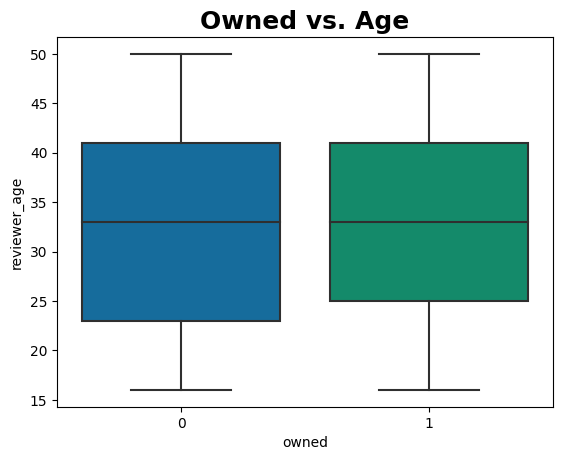

In [21]:
sns.boxplot(x=df['owned'], y=df['reviewer_age'])
plt.title('Owned vs. Age',fontsize=18, weight='bold');

##**Plot for distribution of column**




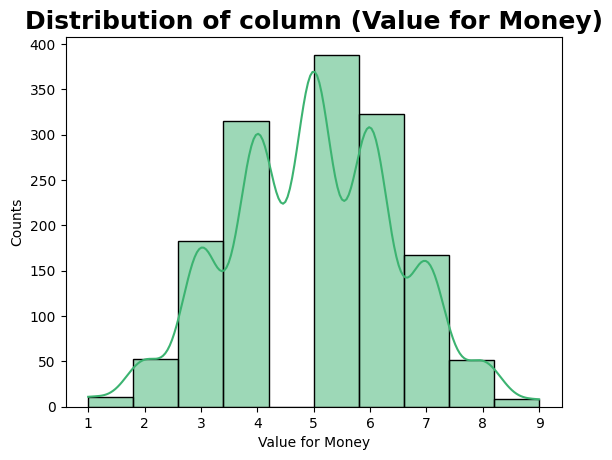

In [22]:
num_bins = 10  # Adjust this value as needed

# Create the histogram with wider bars
plt.title('Distribution of column (Value for Money)', fontsize=18, fontweight='bold')
sns.histplot(df['value_for_money'], color='mediumseagreen', kde=True, bins=num_bins)
plt.xlabel('Value for Money')
plt.ylabel('Counts')

# Show the plot
plt.show();

##**Modelling**
- `Logistic Regression`
- `K-Nearest Neighbors Classifier`
- `Random Forest Classifier`

In [23]:
np.random.seed(42)
X = df.drop('owned', axis=1)
y = df['owned']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X

,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating,review_month_date
0,5,0,2,23.0,1,5.0,18.62,16.0
1,6,0,0,24.0,1,4.0,15.55,16.0
2,4,11,2,28.0,1,5.0,12.76,23.0
3,2,10,4,41.0,2,5.0,17.07,7.0
4,4,12,2,33.0,2,5.0,12.29,16.0
...,...,...,...,...,...,...,...,...
1495,5,9,2,33.0,2,6.0,18.76,18.0
1496,5,8,0,39.0,1,5.0,18.56,11.0
1497,5,10,2,21.0,1,8.0,20.22,10.0
1498,5,0,6,45.0,1,3.0,18.51,16.0


In [24]:
y

0       1
1       0
2       0
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    0
1499    1
Name: owned, Length: 1500, dtype: int64

In [25]:
# Put models in dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Function to fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.74, 'KNN': 0.6566666666666666, 'Random Forest': 0.72}

###**Model Comparison**

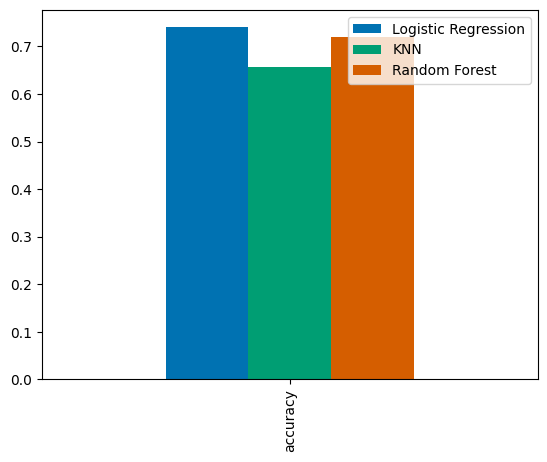

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar();

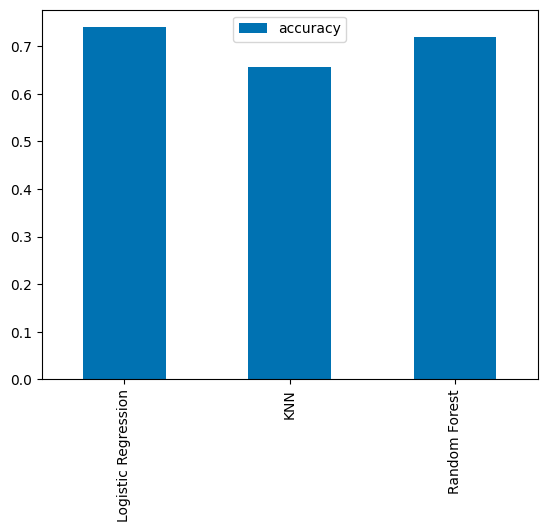

In [28]:
model_compare.T.plot.bar();

In [29]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.47, 0.53],
        [0.48, 0.52],
        [0.44, 0.56],
        [0.92, 0.08],
        [0.39, 0.61],
        [0.2 , 0.8 ],
        [0.63, 0.37],
        [0.93, 0.07],
        [0.14, 0.86],
        [0.56, 0.44]]),
 300)

In [30]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [31]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.53, 0.52, 0.56, 0.08, 0.61, 0.8 , 0.37, 0.07, 0.86, 0.44])

In [32]:
# Calculating fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00877193, 0.00877193, 0.02631579, 0.02631579, 0.02631579,
       0.02631579, 0.02631579, 0.03508772, 0.03508772, 0.04385965,
       0.05263158, 0.07017544, 0.07894737, 0.0877193 , 0.10526316,
       0.10526316, 0.12280702, 0.12280702, 0.13157895, 0.14912281,
       0.14912281, 0.14912281, 0.15789474, 0.18421053, 0.18421053,
       0.19298246, 0.20175439, 0.21052632, 0.23684211, 0.23684211,
       0.27192982, 0.28070175, 0.29824561, 0.29824561, 0.31578947,
       0.31578947, 0.33333333, 0.35087719, 0.37719298, 0.38596491,
       0.39473684, 0.4122807 , 0.4122807 , 0.42982456, 0.43859649,
       0.45614035, 0.45614035, 0.48245614, 0.5       , 0.51754386,
       0.53508772, 0.55263158, 0.55263158, 0.56140351, 0.56140351,
       0.56140351, 0.57017544, 0.5877193 , 0.59649123, 0.61403509,
       0.62280702, 0.64035088, 0.64912281, 0.65789474, 0.6754386 ,
       0.68421053, 0.69298246, 0.70175439, 0.71929825, 0.72807

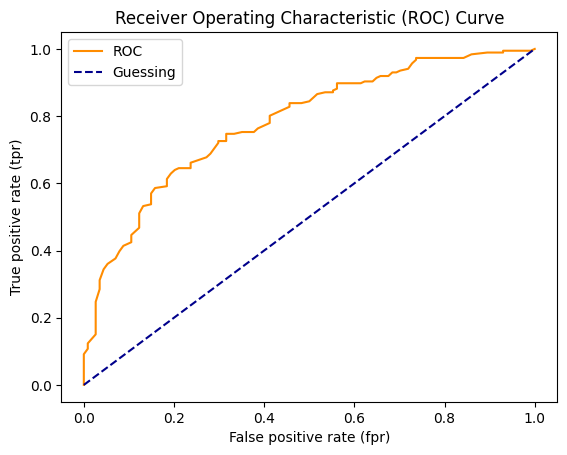

In [33]:
# Creating function for plotting ROC curve
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='darkorange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')

  plt.xlabel('False positive rate (fpr)')
  plt.ylabel('True positive rate (tpr)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [34]:
roc_auc_score(y_test, y_probs_positive)

0.7814563289945293

###**Confusion Matrix**

In [35]:
print(confusion_matrix(y_test, y_preds))

[[ 67  47]
 [ 37 149]]


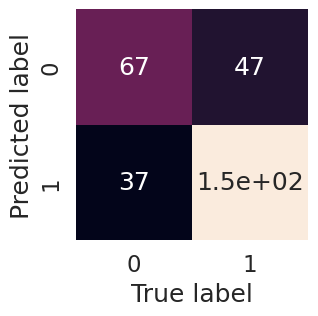

In [36]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                         annot=True,
                         cbar=False)
  plt.xlabel('True label')
  plt.ylabel('Predicted label')

plot_conf_mat(y_test, y_preds)

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       114
           1       0.76      0.80      0.78       186

    accuracy                           0.72       300
   macro avg       0.70      0.69      0.70       300
weighted avg       0.72      0.72      0.72       300



In [40]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
cv_acc=np.mean(cv_acc)

# Cross-validated precision
cv_precision = cross_val_score(clf, X , y, scoring='precision')
cv_precision=np.mean(cv_precision)

# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_recall = np.mean(cv_recall)

# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X , y, scoring='f1')
cv_f1 = np.mean(cv_f1)

print(f'Cross-validated Accuracy: ', cv_acc)
print(f'Cross-validated Precision: ', cv_precision)
print(f'Cross-validated Recall: ', cv_recall)
print(f'Cross-validated F1-score: ', cv_f1)

Cross-validated Accuracy:  0.7326666666666666
Cross-validated Precision:  0.7586361741713034
Cross-validated Recall:  0.8078651685393258
Cross-validated F1-score:  0.7823471078978574


###**Improving Model**

In [41]:
def evaluate_preds(y_test, y_preds):
  accuracy = accuracy_score(y_test, y_preds)
  precision = precision_score(y_test, y_preds)
  recall = recall_score(y_test, y_preds)
  f1 = f1_score(y_test, y_preds)
  metric_dict = {'accuracy': round(accuracy, 2),
                 'precision': round(precision, 2),
                 'recall': round(recall, 2),
                 'f1': round(f1, 2)}
  print(f'Accuracy: {accuracy * 100:.2f}%')
  print(f'Precision: {precision:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'F1: {f1:.2f}')

  return metric_dict

###**Hperparameter tuning with GridSearchCV**

In [42]:
grid = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=None,

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [43]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [44]:
# Make predictions with best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 72.33%
Precision: 0.76
Recall: 0.80
F1: 0.78


##**Feature Importance**

In [45]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [46]:
# Check coef_
clf.coef_

array([[-0.20966778,  0.01532525, -0.02622494, -0.01369654, -0.76614314,
         0.39154511,  0.24734798, -0.034809  ]])

In [47]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'owned': -0.2096677840282189,
 'make_model': 0.015325253594477582,
 'review_month': -0.026224942173668858,
 'web_browser': -0.013696542029810745,
 'reviewer_age': -0.7661431386186786,
 'primary_use': 0.3915451059337151,
 'value_for_money': 0.2473479836344954,
 'overall_rating': -0.034809003500945464}

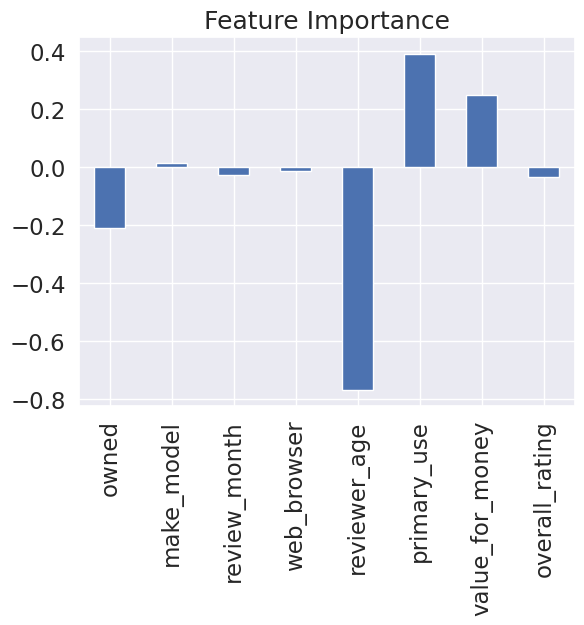

In [48]:
# Visualize feature importance
feature_data = pd.DataFrame(feature_dict, index=[0])
feature_data.T.plot.bar(title='Feature Importance', legend=False);

##**Saving and Loading ML model**

In [49]:
# Save model
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1","wb"))

In [50]:
# Load saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1","rb"))

In [51]:
# Make predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 72.33%
Precision: 0.76
Recall: 0.80
F1: 0.78


{'accuracy': 0.72, 'precision': 0.76, 'recall': 0.8, 'f1': 0.78}

#**DONE**😀